In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

In [2]:
import scipy.io
mat_dict = scipy.io.loadmat('StevensonV2.mat')
print mat_dict.keys()

['handPos', 'spikes', 'timeBase', 'Publication', 'handVel', '__header__', '__globals__', 'startBins', 'startBinned', 'time', '__version__', 'targets', 'target']


In [3]:
X0 = mat_dict['spikes'].T
y0 = mat_dict['handVel'][0,:]
print "nt: %i, nnueron: %i"%(X0.shape)

nt: 15536, nnueron: 196


In [4]:
time = mat_dict['time'][0,:]
tsamp = []
for val in range(0,len(time)-1):
    tsamp.append(time[val+1] - time[val])
ttotal = time[len(time)-1] - time[0]
print ttotal

776.75


In [7]:
trsamps = len(X0) // 2
tesamps = len(X0) - trsamps
Xtr = X0[0:trsamps]
ytr = y0[0:trsamps]
Xts = X0[tesamps:len(X0)]
yts = y0[tesamps:len(X0)]

In [1]:
from sklearn import linear_model

linmod = linear_model.LinearRegression()
linmod.fit(X0,y0)
ytr_pred = linmod.predict(X0)
RSS_tr = np.mean((ytr_pred-y0)**2)/(np.std(y0)**2)
print RSS_tr

TypeError: __init__() got an unexpected keyword argument 'C'

C:\Users\nadjatee\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in divide


<Container object of 3 artists>

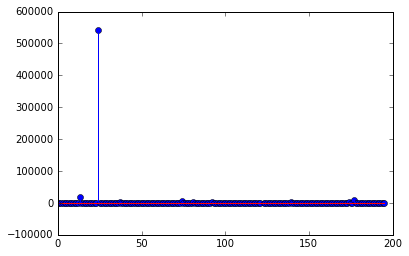

In [9]:
Rsq = []
Xm = np.mean(X0,axis=1)
yrsq = y0 - np.mean(y0,axis=0)
for row in X0.T:
    Rsq.append(np.mean(((row - Xm) * yrsq)/(np.std(row * y0))**2))
plt.stem(Rsq)


In [10]:
d = 100
Isel = np.argsort(Rsq)[len(Rsq)-d-1:len(Rsq)-1]
print "The neurons with the ten highest R^2 values =", np.array_str(Isel[0:9])


The neurons with the ten highest R^2 values = [ 61 158 136 186  30 114  29 121  59]


In [72]:
linmod.fit(X0[:,Isel],y0)
ytr_pred = linmod.predict(X0[:,Isel])
RSS_tr = np.mean((ytr_pred-y0)**2)/(np.std(y0)**2)
print RSS_tr

0.714126931041


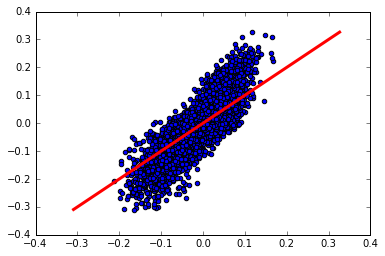

In [15]:
plt.scatter(ytr_pred, y0)
ymin = np.min(y0)
ymax = np.max(y0)
plt.plot([ymin,ymax], [ymin,ymax], 'r-', linewidth=3)

In [ ]:
import  sklearn.model_selection 

# Create a k-fold object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Model orders to be tested
dtest = np.arange(10,200,10)
nd = len(dtest)

Isel = np.argsort(Rsq)
RSSts = np.zeros((nd,nfold))
#looping over the folds
for isplit, Ind in enumerate(kf.split(X0)):

    Itr,Its = Ind

    for it,d in enumerate(dtest):

        I = np.array(Isel[d:])

        xtr= X0[:,I][Itr,:]
        ytr= y0[Itr]
        xts= X0[:,I][Its,:]
        yts= y0[Its]


        linmod.fit(xtr,ytr)
        yts_hat = linmod.predict(xts)

        RSSts[it,isplit] = np.mean((yts_hat-yts)**2)
        
RSS_mean = np.mean(RSSts,axis=1)
RSS_std = np.std(RSSts,axis=1)/ np.sqrt(nfold-1)
plt.errorbar(dtest,RSS_mean,yerr=RSS_std,fmt='-')
plt.xlabel("Model order")
plt.ylabel("Test RSS")
plt.grid()